# Sentiment Analysis

### About Dataset

IMDB dataset having 50K movie reviews for natural language processing or Text analytics.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms.
For more dataset information, please go through the following link,
http://ai.stanford.edu/~amaas/data/sentiment/

In [1]:
# Importing Libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('IMDB Dataset.csv')

In [3]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
df['review'][9]

'If you like original gut wrenching laughter you will like this movie. If you are young or old then you will love this movie, hell even my mom liked it.<br /><br />Great Camp!!!'

In [5]:
df['review'][99]

"I have been a Mario fan for as long as I can remember, I have very fond memories of playing Super Mario World as a kid, this game has brought back many of those memories while adding something new. Super Mario Galaxy is the latest installment in the amazing Mario franchise. There is much very different about this game from any other Mario before it, while still keeping intact the greatest elements of Mario, the first noticeable difference is that the story takes place in space.<br /><br />The story begins much like any other Mario game, Mario receives a letter from Princess Peach inviting him to a celebration at her castle in the Mushroom Kingdom. Upon arriving at Peach's castle Mario finds Bowser and his son (Bowser Jr.) attacking the castle with their airships. Bowser kidnaps Princess Peach and then lifts her castle up into space. In the midst of the castle being lifted into space Mario falls off and lands on an unknown planet. Mario is found by a talking star named Luma and is take

In [6]:
df.shape

(50000, 2)

In [7]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [8]:
df.duplicated().sum()

418

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [10]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [11]:
# dropping duplicates
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.nunique()

review       49582
sentiment        2
dtype: int64

In [14]:
df.sentiment.value_counts()

positive    24884
negative    24698
Name: sentiment, dtype: int64

C:\Users\LENOVO X1 YOGA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


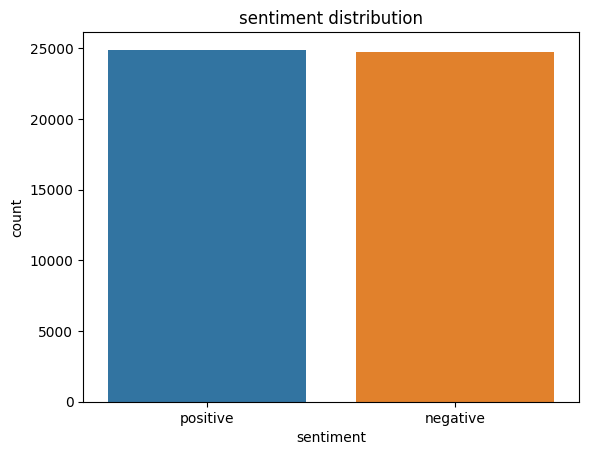

In [15]:
# visulaize the sentiment using bar plot
sns.countplot(df.sentiment)
plt.title('sentiment distribution')
plt.show()

## Text Pre-Processing

In [16]:
df.review[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [17]:
# convert sentiment column to numeric 


df.sentiment=df.sentiment.map({'positive':1,'negative':0})

In [18]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


### Removing HTML Tags


In [19]:
from bs4 import BeautifulSoup

# Function to remove HTML tags from text
def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    cleaned_text = soup.get_text()
    return cleaned_text

# Apply the function to the 'review' column
df['cleaned_text'] = df['review'].apply(remove_html_tags)

# Print the DataFrame to see the cleaned text
print(df['cleaned_text'])


C:\Users\LENOVO X1 YOGA\AppData\Local\Programs\Python\Python39\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


0        One of the other reviewers has mentioned that ...
1        A wonderful little production. The filming tec...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: cleaned_text, Length: 49582, dtype: object


In [20]:
df['cleaned_text'][990]

"It is incredible that there were two films with the same story released in 2005. This one came out a day before that other one with Tom Cruise. Didn't they do that with Truman Capote the same year, and the Zodiac killer last year? Interesting.Writer/Director David Michael Latt didn't have Steven Spielberg's budget and C. Thomas Howell is not Tom Cruise. This is a pale imitation of the blockbuster that grossed $588 million worldwide.The action was minimal and most of the time we were treated to the whining of Rhett Giles, who played a pastor that was giving up on his god.Gary Busey was creepy as an army LT."

### Converting Text to Lower Case

In [21]:
# convert text to lowercase
def to_lower(text):
    return text.lower()

df['cleaned_text'] = df['cleaned_text'].apply(to_lower)

In [22]:
df.cleaned_text[0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where other shows wo

### Removing Special Charecters from text

In [23]:
# funtion to remove special charecter
import re
def remove_special_char(text):
    pattern = re.compile('[^a-zA-Z ]')
   
    return re.sub(pattern,'',text)

df['cleaned_text'] = df['cleaned_text'].apply(remove_special_char)
    
    


In [24]:
df.cleaned_text[0]

'one of the other reviewers has mentioned that after watching just  oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty picture

### Removing Stop Words

In [25]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [26]:
stop_words_list=stopwords.words('english')

In [27]:
stop_words_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
# function to remove stop words

def remove_stop_words(text):
    stop_words_list=stopwords.words('english')
    token = word_tokenize(text)
    filter_text = [i for i in token if i.lower() not in stop_words_list]
    return  ' '.join(filter_text)

In [29]:
df.cleaned_text=df['cleaned_text'].apply(remove_stop_words)

In [30]:
df.cleaned_text[8909]

'stop hard one cheerleaders coach couple guys trapped within cabin woods unseen killer kills one one shame totally wrote jim wynorski horrid busty cops long time coming last truly good film hard die still reason got hopes supposed sequel slumber party massacre sadly even mediocre expectations met outing nearly fun even three previous films franchise yes im including spm tell something furthermore slasher film little gore mean come grade eye candy ricky ray gets topless april flowers charity rahmer show boobs buns shower scene april gets nude later film tamie sheffield gets topless bares buns'

### Performing Lemmetaization

In [31]:
from nltk.stem import WordNetLemmatizer

In [32]:
def lemmetized_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    lemmetized_token = [lemmatizer.lemmatize(token) for token in tokens]
    lemmatized_text  = ' '.join(lemmetized_token)
    return lemmatized_text

In [33]:
df['cleaned_text']=df['cleaned_text'].apply(lemmetized_text)

In [34]:
df['cleaned_text'][8909]

'stop hard one cheerleader coach couple guy trapped within cabin wood unseen killer kill one one shame totally wrote jim wynorski horrid busty cop long time coming last truly good film hard die still reason got hope supposed sequel slumber party massacre sadly even mediocre expectation met outing nearly fun even three previous film franchise yes im including spm tell something furthermore slasher film little gore mean come grade eye candy ricky ray get topless april flower charity rahmer show boob bun shower scene april get nude later film tamie sheffield get topless bares bun'

# Word Cloud for Positive Reviews

In [35]:
#word cloud for positive review words
pos_reviews =  df[df.sentiment == 1]
pos_reviews.head()

,review,sentiment,cleaned_text
0,One of the other reviewers has mentioned that ...,1,one reviewer mentioned watching oz episode you...
1,A wonderful little production. <br /><br />The...,1,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,1,thought wonderful way spend time hot summer we...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter matteis love time money visually stunni...
5,"Probably my all-time favorite movie, a story o...",1,probably alltime favorite movie story selfless...


In [36]:
#!pip install wordcloud


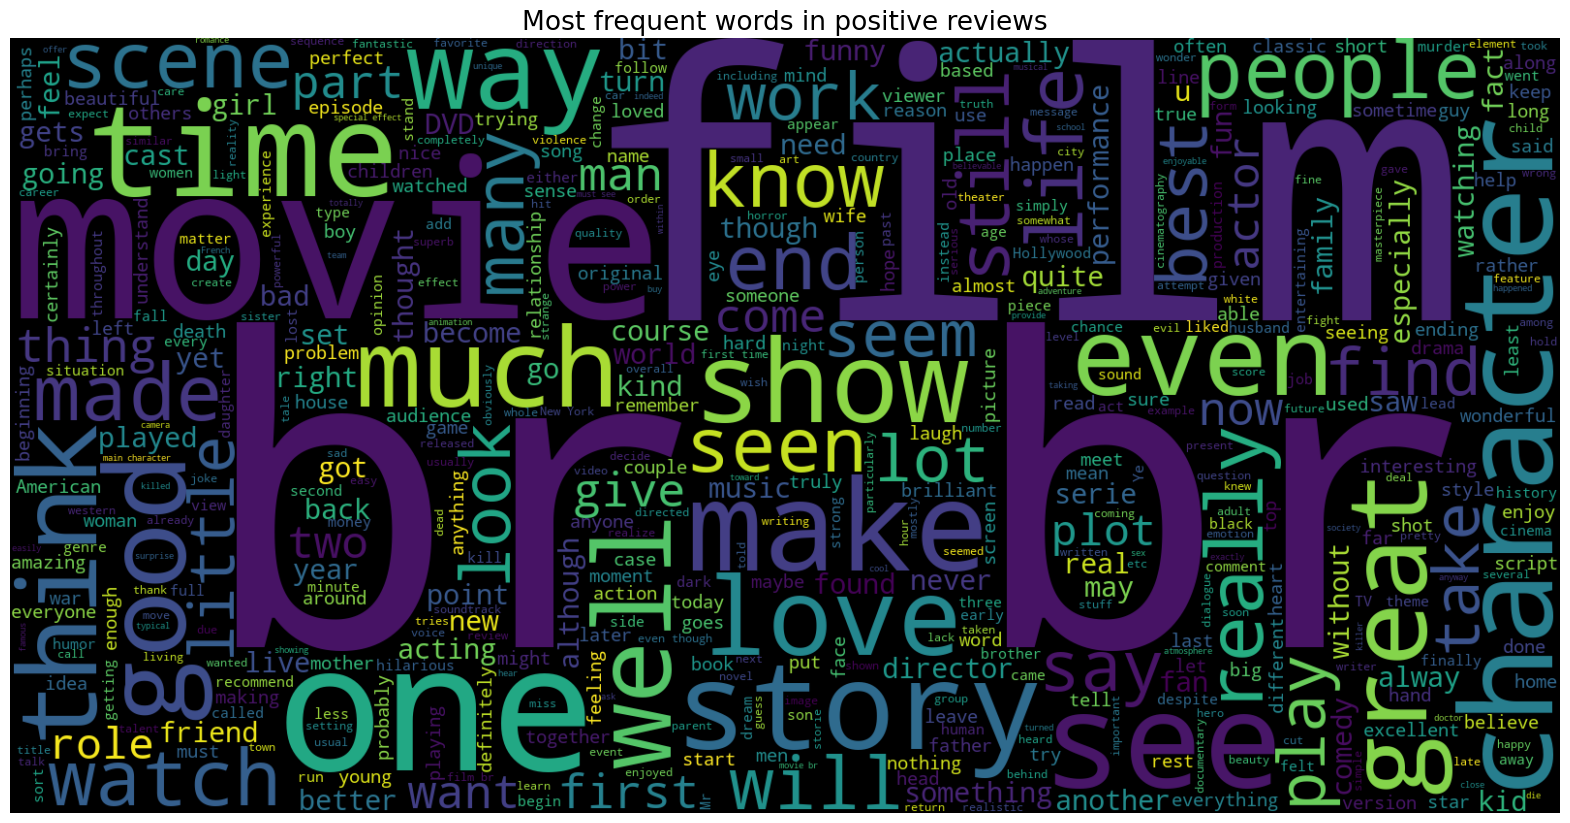

In [37]:
from wordcloud import WordCloud


text = ' '.join([word for word in pos_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()


# Word Cloud for Negative Words

In [38]:
#word cloud for negitive review words
neg_reviews =  df[df.sentiment == 0]
neg_reviews.head()

,review,sentiment,cleaned_text
3,Basically there's a family where a little boy ...,0,basically there family little boy jake think t...
7,"This show was an amazing, fresh & innovative i...",0,show amazing fresh innovative idea first aired...
8,Encouraged by the positive comments about this...,0,encouraged positive comment film looking forwa...
10,Phil the Alien is one of those quirky films wh...,0,phil alien one quirky film humour based around...
11,I saw this movie when I was about 12 when it c...,0,saw movie came recall scariest scene big bird ...


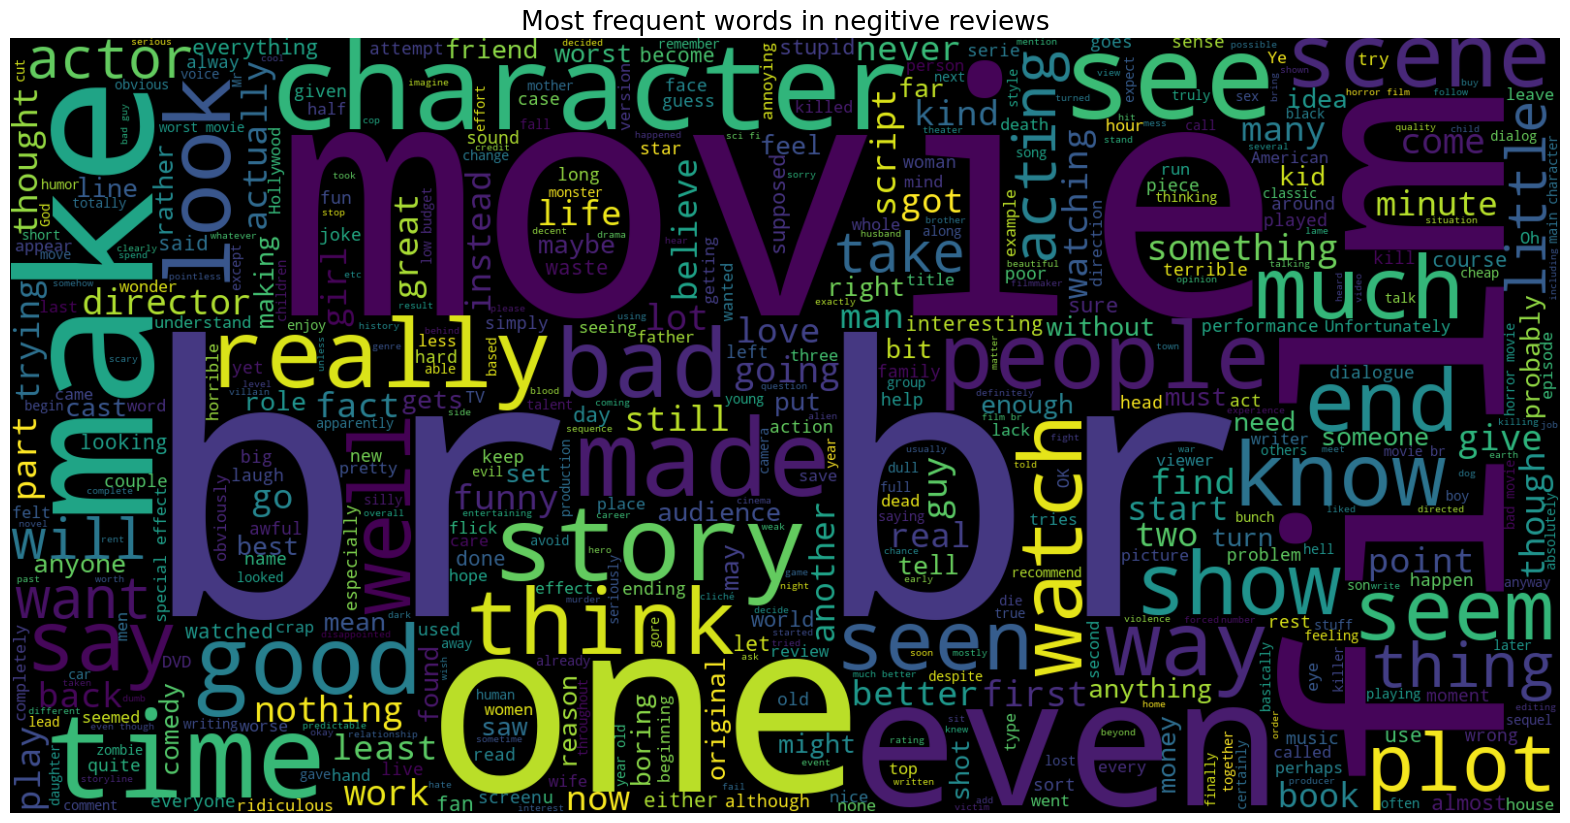

In [39]:
text = ' '.join([word for word in neg_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negitive reviews', fontsize = 19)
plt.show()

## Model Building

In [40]:
x = df.cleaned_text

In [41]:
x

0        one reviewer mentioned watching oz episode you...
1        wonderful little production filming technique ...
2        thought wonderful way spend time hot summer we...
3        basically there family little boy jake think t...
4        petter matteis love time money visually stunni...
                               ...                        
49995    thought movie right good job wasnt creative or...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary school nu...
49998    im going disagree previous comment side maltin...
49999    one expects star trek movie high art fan expec...
Name: cleaned_text, Length: 49582, dtype: object

In [42]:
y = df.sentiment

In [43]:
y

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 49582, dtype: int64

### Train_Test Split

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=(0.25))

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [47]:
X_train_cv = cv.fit_transform(X_train)

In [48]:
X_test_cv = cv.transform(X_test)

In [49]:
print("Total unique words:", len(cv.vocabulary_))

Total unique words: 168945


In [50]:
print("Shape of input data:", X_train_cv.shape)

print("Shape of input data:", X_test_cv.shape)

Shape of input data: (37186, 168945)
Shape of input data: (12396, 168945)


In [51]:
feature_names = cv.get_feature_names()
feature_names


C:\Users\LENOVO X1 YOGA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aa',
 'aaa',
 'aaaaaaaargh',
 'aaaaagh',
 'aaaaah',
 'aaaaarrrrrrgggggghhhhhh',
 'aaaaatchkah',
 'aaaaaw',
 'aaaand',
 'aaaawwwwww',
 'aaaggghhhhhhh',
 'aaagh',
 'aaah',
 'aaahthe',
 'aaand',
 'aaargh',
 'aaarrrghim',
 'aaaugh',
 'aachen',
 'aada',
 'aadmittedly',
 'aag',
 'aage',
 'aagh',
 'aaghh',
 'aah',
 'aahed',
 'aahhh',
 'aahhhh',
 'aahing',
 'aailiyah',
 'aaip',
 'aaja',
 'aajala',
 'aak',
 'aakash',
 'aake',
 'aaker',
 'aakrosh',
 'aaliyah',
 'aaliyahs',
 'aalox',
 'aames',
 'aamess',
 'aamilne',
 'aamir',
 'aamirs',
 'aamirso',
 'aamr',
 'aan',
 'aankh',
 'aankhen',
 'aaoon',
 'aap',
 'aapke',
 'aaran',
 'aardman',
 'aardmans',
 'aardmanthe',
 'aardvark',
 'aarf',
 'aargh',
 'aarghlets',
 'aarika',
 'aaron',
 'aarona',
 'aaronanchors',
 'aaroncurb',
 'aarp',
 'aarrrgh',
 'aashok',
 'aasmaan',
 'aasman',
 'aatish',
 'aaton',
 'aau',
 'aauugghh',
 'aavjo',
 'aawip',
 'ab',
 'aba',
 'ababy',
 'aback',
 'abagail',
 'abahy',
 'abanazer',
 'abandon',
 'abandoned',
 'abandoning',


In [52]:
cv.vocabulary_

{'film': 52634,
 'pick': 111935,
 'pound': 115031,
 'turn': 154328,
 'rather': 119937,
 'good': 61129,
 'rd': 120198,
 'century': 23383,
 'released': 122005,
 'dozen': 41540,
 'obscure': 103731,
 'italian': 76148,
 'american': 5019,
 'movie': 97116,
 'great': 62301,
 'although': 4635,
 'hardgore': 65194,
 'fulci': 57270,
 'amongst': 5189,
 'others': 106756,
 'bulk': 19741,
 'output': 107256,
 'crap': 31951,
 'like': 85182,
 'zombie': 168740,
 'chroniclesthe': 25698,
 'positive': 114610,
 'thing': 148844,
 'say': 127943,
 'nowhere': 103096,
 'near': 99989,
 'annoying': 6052,
 'stink': 141147,
 'flesh': 54428,
 'clumsy': 27242,
 'anthology': 6271,
 'technical': 146629,
 'competence': 28858,
 'lego': 83965,
 'house': 70297,
 'built': 19696,
 'whelkits': 163626,
 'noted': 102603,
 'elsewhere': 44926,
 'really': 120507,
 'worry': 166136,
 'insert': 74271,
 'preview': 116087,
 'action': 1206,
 'credit': 32325,
 'sequence': 131531,
 'time': 150301,
 'get': 59514,
 'attack': 9188,
 'youve': 16

### Multinomial Naive Bayes

Multinomial Naive Bayes is a variant of the Naive Bayes algorithm that is specifically designed for classification tasks with discrete features. It is commonly used for text classification problems where the features represent word counts or term frequencies.

The algorithm is based on the principle of Bayes' theorem and assumes that the features are conditionally independent given the class label. In the case of Multinomial Naive Bayes, it assumes that the feature probabilities follow a multinomial distribution.

The algorithm works by estimating the probabilities of each class and the probabilities of each feature given each class from the training data. During prediction, it calculates the posterior probability of each class given the features and selects the class with the highest probability as the predicted class.

Multinomial Naive Bayes is suitable for situations where the features are discrete or can be discretized, such as word counts or term frequencies in text classification tasks. It is widely used in applications such as spam detection, sentiment analysis, and topic classification.

Despite its simplicity and the assumption of feature independence, Multinomial Naive Bayes has been shown to perform well in many text classification tasks and is computationally efficient. However, it may not perform well when the independence assumption is violated or when the features are not appropriate for the task at hand.

In [53]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Train the model 
clf = MultinomialNB()
clf.fit(X_train_cv, y_train)

# Evaluate the model on the test set
y_test_pred = clf.predict(X_test_cv)
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test set accuracy: {accuracy:.3f}")

print(classification_report(y_test, y_test_pred))


Test set accuracy: 0.856
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      6203
           1       0.87      0.84      0.85      6193

    accuracy                           0.86     12396
   macro avg       0.86      0.86      0.86     12396
weighted avg       0.86      0.86      0.86     12396



### Bernoulli Naive Bayes

Bernoulli Naive Bayes is another variant of the Naive Bayes algorithm, similar to Multinomial Naive Bayes. It is specifically designed for binary feature vectors, where each feature represents the presence or absence of a particular attribute.

In Bernoulli Naive Bayes, the features are modeled as binary random variables, following a Bernoulli distribution. This means that each feature can take on only two values: 0 (absence) or 1 (presence). The algorithm assumes that the features are conditionally independent given the class label, just like in Multinomial Naive Bayes.

The algorithm works by estimating the probabilities of each class and the probabilities of each feature being 1 given each class from the training data. During prediction, it calculates the posterior probability of each class given the binary features and selects the class with the highest probability as the predicted class.

Bernoulli Naive Bayes is commonly used in text classification tasks where the features represent the presence or absence of certain words or features. It is especially suitable when the presence of features is more informative than their frequency. For example, in sentiment analysis, where the focus is on identifying whether certain words are present in a text rather than their frequency.

Similar to Multinomial Naive Bayes, Bernoulli Naive Bayes is simple, computationally efficient, and can work well in certain binary feature scenarios. However, it may not perform well when the independence assumption is violated or when the features are not well-suited for the task at hand.

In [54]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
clf = bnb.fit(X_train_cv,y_train)
y_pred = clf.predict(X_test_cv)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8543078412391094
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      6203
           1       0.87      0.83      0.85      6193

    accuracy                           0.85     12396
   macro avg       0.86      0.85      0.85     12396
weighted avg       0.86      0.85      0.85     12396



### SVC (Support Vector Classifier)

SVC stands for Support Vector Classifier, which is a specific implementation of Support Vector Machine (SVM) for classification tasks in the scikit-learn library. SVC is a powerful algorithm for binary and multi-class classification.

In scikit-learn, the SVC class provides an implementation of the SVM algorithm. It allows you to train a classifier by fitting the model to labeled training data. SVC finds the optimal hyperplane that maximally separates the data points of different classes, similar to the SVM algorithm.

SVC can handle linearly separable as well as non-linearly separable data using different kernel functions such as linear, polynomial, and radial basis function (RBF). The choice of kernel function depends on the nature of the data and the desired decision boundary.
Once the SVC model is trained, it can be used to predict the class labels for new, unseen data points. SVC assigns class labels based on which side of the decision boundary the data point falls.

Overall, SVC is a widely used classifier in machine learning due to its ability to handle both linear and non-linear classification problems and its effectiveness in finding optimal decision boundaries. It is commonly applied in various domains such as image classification, text classification, and bioinformatics.

# Term Frequency Inverse Document Frequency

TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic that reflects the importance of a term in a document within a collection or corpus of documents. It is commonly used in information retrieval and text mining tasks, particularly for document classification and text similarity.

TF (Term Frequency) measures the frequency of a term in a document. It quantifies how often a term appears in a document relative to the total number of terms in that document. TF is calculated using the formula:

TF(term, document) = (Number of occurrences of the term in the document) / (Total number of terms in the document)

IDF (Inverse Document Frequency) measures the rarity of a term across the entire corpus. It quantifies how much information the term provides by taking into account how often it appears in the entire corpus. IDF is calculated using the formula:

IDF(term, corpus) = log((Total number of documents in the corpus) / (Number of documents containing the term))

TF-IDF is obtained by multiplying the TF value of a term in a document by the IDF value of the term in the corpus. This helps to emphasize terms that are frequent in a particular document but rare in the entire corpus, thus giving more weight to important and discriminative terms.

The TF-IDF representation of a document is a vector that represents the weights of different terms in the document. It can be used as input for various machine learning algorithms, such as text classification, clustering, and information retrieval, to capture the importance of terms in documents and enable meaningful analysis and comparisons.

In summary, TF-IDF is a numerical representation that combines term frequency and inverse document frequency to measure the importance of terms in documents within a corpus. It helps to highlight the significance of terms in individual documents while considering their rarity across the entire collection.

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
X_train_tf ,X_test_tf,y_train_tf,y_test_tf = train_test_split(x,y,test_size=(0.25),random_state = 42)

In [56]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train_tf)
X_test_tfidf = vectorizer.transform(X_test_tf)


### Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the model on the TF-IDF vectors
clf = RandomForestClassifier()
clf.fit(X_train_tfidf, y_train_tf)

# Evaluate the model on the test set
y_test_pred = clf.predict(X_test_tfidf)
accuracy = accuracy_score(y_test_tf, y_test_pred)
print(f"Test set accuracy: {accuracy:.3f}")

print(classification_report(y_test_tf, y_test_pred))


Test set accuracy: 0.841
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      6168
           1       0.84      0.84      0.84      6228

    accuracy                           0.84     12396
   macro avg       0.84      0.84      0.84     12396
weighted avg       0.84      0.84      0.84     12396



### Multinomial Naive bayes

In [61]:

clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train_tf)

# Evaluate the model on the test set
y_test_pred = clf.predict(X_test_tfidf)
accuracy=accuracy_score(y_test_pred,y_test_tf)
print(f"Test set accuracy: {accuracy:.3f}")
print(classification_report(y_test_tf, y_test_pred))

Test set accuracy: 0.861
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      6168
           1       0.87      0.85      0.86      6228

    accuracy                           0.86     12396
   macro avg       0.86      0.86      0.86     12396
weighted avg       0.86      0.86      0.86     12396



# Word2Vec

Word2Vec, or word embeddings, is a technique used to represent words in a vector space based on their contextual meaning. It is a popular method in natural language processing (NLP) and machine learning for capturing semantic relationships between words.

In traditional NLP approaches, words are typically represented as one-hot encoded vectors, where each word is represented by a sparse binary vector with a dimension equal to the size of the vocabulary. However, this representation lacks the ability to capture the semantic relationships between words.

Word2Vec, on the other hand, learns continuous word embeddings by considering the context in which words appear. It is based on the assumption that words that have similar meanings tend to appear in similar contexts. There are two main architectures for Word2Vec: Continuous Bag-of-Words (CBOW) and Skip-gram.

In the CBOW architecture, the model predicts the current word based on its context words (surrounding words). In contrast, the Skip-gram architecture predicts the context words given the current word. Both architectures learn to generate word embeddings that encode semantic relationships between words.

Word embeddings generated by Word2Vec capture semantic similarities and relationships. Similar words are represented by vectors that are close together in the vector space, and vector arithmetic can be performed to capture relationships like analogy and similarity. For example, "king - man + woman" can be approximately equal to "queen".

In [62]:
! pip install gensim

     ---------------------------------------- 23.9/23.9 MB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 56.8/56.8 kB 2.9 MB/s eta 0:00:00


In [63]:
! pip install --upgrade gensim

In [72]:
from gensim.models import Word2Vec

X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(x, y, test_size=0.2, random_state=42)
model = Word2Vec(X_train_w, vector_size=500, window=5, min_count=1)

# Convert text to word embeddings
X_train_embeddings = []
for document in X_train_w:
    embeddings = [model.wv[word] for word in document if word in model.wv]
    average_embedding = sum(embeddings) / len(embeddings)
    X_train_embeddings.append(average_embedding)
    
    
# Convert test data to word embeddings
X_test_embeddings = []
for document in X_test_w:
    embeddings = [model.wv[word] for word in document if word in model.wv]
    average_embedding = sum(embeddings) / len(embeddings)
    X_test_embeddings.append(average_embedding)


### Bernoulli Naive Bayes

In [73]:
bnb = BernoulliNB()
clf = bnb.fit(X_train_embeddings,y_train_w)
y_pred = clf.predict(X_test_embeddings)
print(accuracy_score(y_test_w,y_pred))
print(classification_report(y_test_w,y_pred))

0.5741655742664112
              precision    recall  f1-score   support

           0       0.57      0.60      0.58      4939
           1       0.58      0.55      0.56      4978

    accuracy                           0.57      9917
   macro avg       0.57      0.57      0.57      9917
weighted avg       0.57      0.57      0.57      9917



### Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_embeddings, y_train_w)
y_pred = classifier.predict(X_test_embeddings)
accuracy = accuracy_score(y_test_w, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_pred,y_test_w))

Accuracy: 0.6026015932237572
              precision    recall  f1-score   support

           0       0.58      0.61      0.59      4740
           1       0.62      0.60      0.61      5177

    accuracy                           0.60      9917
   macro avg       0.60      0.60      0.60      9917
weighted avg       0.60      0.60      0.60      9917



### Support Vector Classifier

In [77]:
from sklearn.svm import SVC
s = SVC().fit(X_train_embeddings,y_train_w)
y_pred = s.predict(X_test_embeddings)
print(accuracy_score(y_test_w,y_pred))
print(classification_report(y_test_w,y_pred))


0.6194413633155188
              precision    recall  f1-score   support

           0       0.61      0.64      0.63      4939
           1       0.63      0.60      0.61      4978

    accuracy                           0.62      9917
   macro avg       0.62      0.62      0.62      9917
weighted avg       0.62      0.62      0.62      9917



### BERT

BERT (Bidirectional Encoder Representations from Transformers) is a transformer-based language model that was introduced by Google in 2018. It has had a significant impact on various natural language processing (NLP) tasks, including but not limited to text classification, sentiment analysis, named entity recognition, question answering, and machine translation.

Unlike traditional language models that read text input in a left-to-right or right-to-left manner, BERT utilizes a bidirectional approach by considering the context from both directions simultaneously. It is pre-trained on a large corpus of text data, such as Wikipedia articles, to learn general language representations.

BERT has a deep architecture consisting of multiple transformer layers. Transformers are attention-based models that enable capturing contextual relationships between words. BERT's architecture allows it to learn fine-grained contextual representations, making it effective for a wide range of NLP tasks.

The pre-training phase of BERT involves two key tasks: masked language modeling (MLM) and next sentence prediction (NSP). In MLM, a percentage of words in the input text are randomly masked, and the model is trained to predict those masked words. In NSP, BERT is trained to predict whether two sentences in a pair are consecutive or not.

After pre-training, BERT can be fine-tuned on specific downstream tasks by adding task-specific layers and training on task-specific data. Fine-tuning BERT on task-specific datasets helps the model adapt to the specific nuances and requirements of the target task.

BERT has achieved state-of-the-art performance on various NLP benchmarks and has become a popular choice for many NLP applications. Its ability to capture contextual information effectively and its pre-trained representations have made it a powerful tool for transfer learning in NLP.

In [80]:
y

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 49582, dtype: int64

In [78]:
X_train_b,X_test_b,y_train_b,y_test_b = train_test_split(x,y,test_size=0.2,random_state=42)

In [82]:
print(X_train_w[:5])  # Print first 5 values of X_train_w
print(y_train_w[:5])  # Print first 5 values of y_train_w
print(type(X_train_w))  # Print data type of X_train_w
print(type(y_train_w))  # Print data type of y_train_w


7837     really liked movie emporers new groove watchin...
4814     decided watch movie noted scariest movie ever ...
35458    hard say going lady shanghai film could withou...
3446     scifi adventure best mean worst agree statemen...
24478    around late animator bluth frustrated output c...
Name: cleaned_text, dtype: object
7837     0
4814     0
35458    1
3446     0
24478    0
Name: sentiment, dtype: int64
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [88]:
# Importing Sentence Transformer

from sentence_transformers import SentenceTransformer, util

In [89]:
# Downloading pretrained model

model = SentenceTransformer('all-MiniLM-L6-v2')

In [ ]:
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np

# Load the SentenceTransformer model
model_name = 'bert-base-nli-mean-tokens'
model = SentenceTransformer(model_name)

# Function to get document vector
def get_doc_vector(text):
    vectors = model.encode(text)
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.get_sentence_embedding_dimension())

# Apply the get_doc_vector function to the 'review' column
df['token'] = df['review'].apply(lambda x: get_doc_vector(x.split()))


Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]